In [54]:
from openbb import obb
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import detecta

import sys
sys.path.append(r'C:\Users\avido\Documents\other code\AlgoTrading')
from utils import local_data_interface as ldi
from assets.api_credentials import openbb_pat
obb.account.login(pat=openbb_pat, remember_me=True)

import indicators as inds
from indicators import custom_indicators as ci
from indicators import pandas_ta_indicators as pti
from indicators import tulipy_indicators as ti
from indicators import sets
from indicators import metaindicators as mi
from utils import ohlc_utils as ou

%load_ext autoreload
%autoreload 2

plt.rcParams['figure.figsize'] = [12, 4]

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
df = ldi.get_ticker(symbol='GOOG', start_date="1980-01-01", end_date='2025-03-10', interval='1d')

df.fillna(method='ffill', inplace=True)
print(len(df))
df.head()

5172


C:\Users\avido\AppData\Local\Temp\ipykernel_41512\1976176805.py:3: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


,open,high,low,close,volume,vwap,adj_close,unadjusted_volume,change,change_percent
date,,,,,,,,,,
2004-08-19,2.49,2.59,2.39,2.50,897427216,2.49,2.49,897427216.0,0.008469,0.003400
2004-08-20,2.52,2.72,2.50,2.70,458857488,2.61,2.69,458857488.0,0.181820,0.072300
2004-08-23,2.76,2.83,2.72,2.72,366857939,2.76,2.72,366857939.0,-0.033624,-0.012200
2004-08-24,2.77,2.78,2.58,2.61,306396159,2.69,2.60,306396159.0,-0.158660,-0.057300
2004-08-25,2.61,2.69,2.59,2.64,184645512,2.63,2.63,184645512.0,0.025903,0.009909


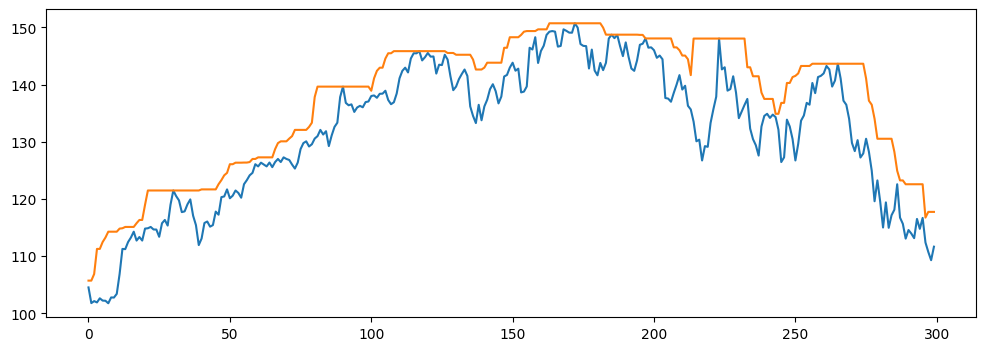

In [65]:
window_size = 10
lookback_start = -1000
lookback_stop = lookback_start + 300
df['close'].values

#calculate a rolling maximum of the close price
df['rolling_max_forward'] = df['close'].rolling(window=window_size).max()
df['rolling_max_backward'] = df['close'][::-1].rolling(window=window_size).max()[::-1]
df['rolling_max'] = np.maximum(df['rolling_max_forward'], df['rolling_max_backward'])

plt.plot(df['close'].values[lookback_start:lookback_stop])
plt.plot(df['rolling_max'].values[lookback_start:lookback_stop])
#plot horizontal line at 0.5
# plt.axhline(y=0.5, color='r', linestyle='--')

(array([ 3.,  8., 14., 36., 19., 20.,  8., 36., 75., 81.]),
 array([105.74 , 110.237, 114.734, 119.231, 123.728, 128.225, 132.722,
        137.219, 141.716, 146.213, 150.71 ]),
 <BarContainer object of 10 artists>)

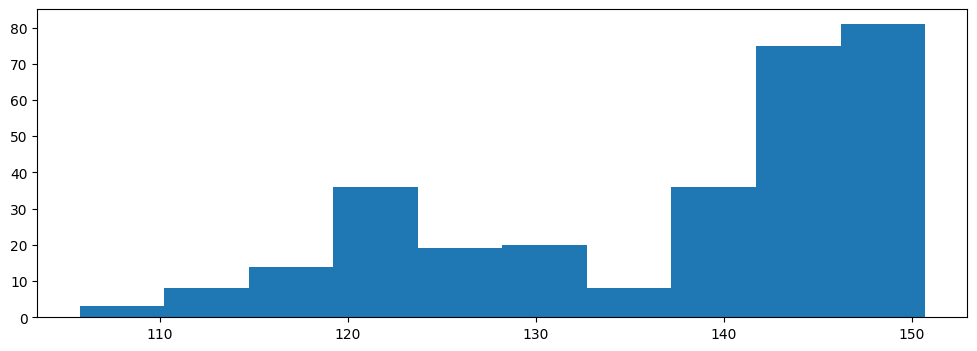

In [66]:
plt.hist(df['rolling_max'].values[lookback_start:lookback_stop], bins=10)

(array([13., 16.,  9.,  5., 16., 23., 41.,  9., 38.,  7., 14., 12., 14.,
        10., 15., 11.,  3.,  2., 16.,  5.]),
 array([56., 57., 58., 59., 60., 61., 62., 63., 64., 65., 66., 67., 68.,
        69., 70., 71., 72., 73., 74., 75., 76.]),
 <BarContainer object of 20 artists>)

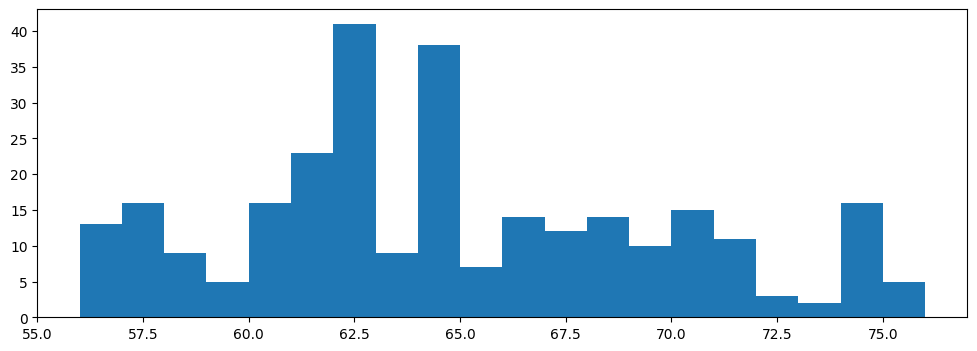

In [63]:
# Define overlapping bins
vals = df['rolling_max'].values[lookback_start:lookback_stop]
bins = np.arange(np.floor(vals.min()), np.ceil(vals.max()), 1)  # Adjust the bin width as needed
# Create the histogram
plt.hist(vals, bins=bins)

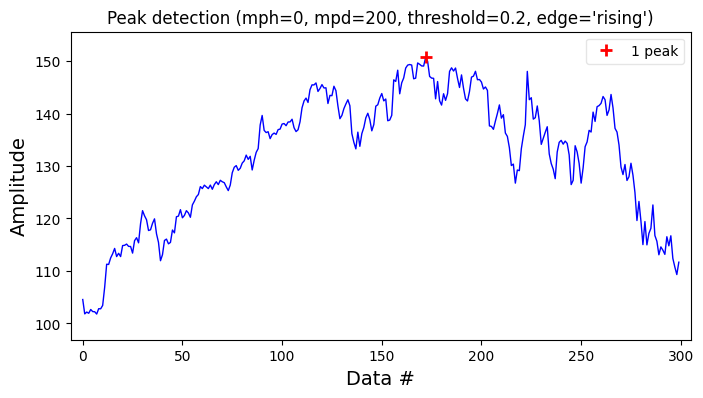

In [67]:
#find peaks using detecta
peaks = detecta.detect_peaks(df['close'].values[lookback_start:lookback_stop], mph=0, mpd=200, threshold=0.2, edge='rising', show=True)

(array([1., 0., 0., 0., 0., 1., 1., 3., 2., 3.]),
 array([41.93 , 42.655, 43.38 , 44.105, 44.83 , 45.555, 46.28 , 47.005,
        47.73 , 48.455, 49.18 ]),
 <BarContainer object of 10 artists>)

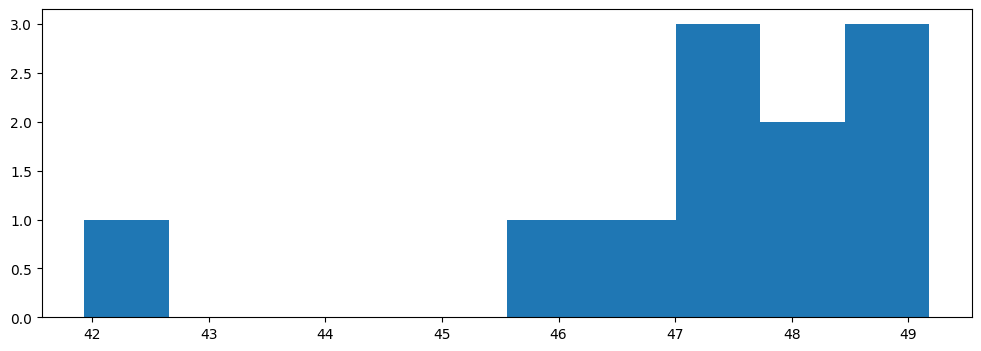

In [46]:
plt.hist(df['close'].values[lookback_start:lookback_stop][peaks], bins=10)